In [2]:
setwd('C:/Users/bki19/OneDrive/deskto/Linear_Regression/data')

In [3]:
df<-read.csv('./Restaurant_Food_Sales.csv')

In [4]:
colnames(df)<-c('Income','Expense')

In [5]:
df

Income,Expense
81464,3000
72661,3150
72344,3085
90743,5225
98588,5350
96507,6090
126574,8925
114133,9015
115814,8885
123181,8950


Y:음식 판매로 매달 평균 수입<br>
X:이에 상응하는 30개 음식점의 연 광고비 지출

In [6]:
fit<-lm(Income~Expense,data=df)

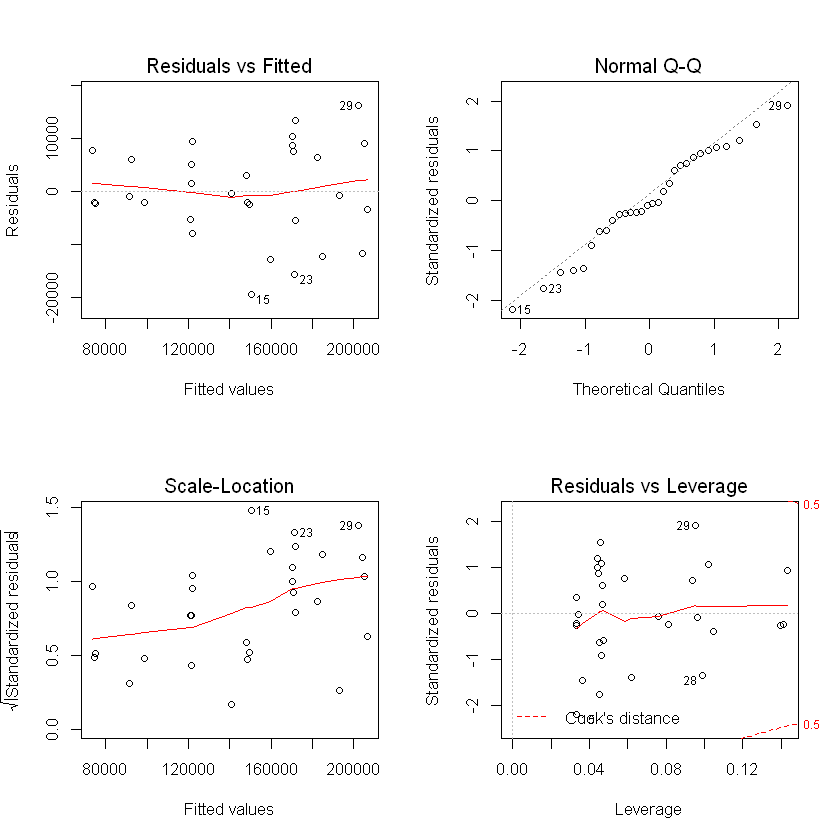

In [7]:
par(mfrow=c(2,2))
plot(fit)

Fitted value와 residual이 점점 퍼지는 것으로 보다 constant variance assumption violated
데이터의 몇개 군집이 near neighbor로 보임

In [8]:
Cluster<-list(c(1:3),c(4:5),c(6),c(7:11),c(12:16),c(17:22),c(23),c(24:25),c(26),c(27:30))

In [9]:
mean(df[c(17:23),2])
df[c(17:22),2]

[1] 14895.71

[1] 13700 15000 15175 14995 15050 15200

In [10]:
n<-length(Cluster)
n

[1] 10

In [11]:
Cluster_mean<-rep(0,n)
Cluster_sd<-rep(0,n)

for (i in 1:n){
    Cluster_mean[i]<-mean(df$Expense[Cluster[[i]] ])
    Cluster_sd[i]<-sd(df$Income[Cluster[[i]] ])^2
       
}


In [12]:
df_sd_mean<-na.omit(cbind(Cluster_mean,Cluster_sd))
df_sd_mean<-data.frame(df_sd_mean)
df_sd_mean[,1]<-round(df_sd_mean[,1],1)
df_sd_mean

Cluster_mean,Cluster_sd
3078.3,26794616
5287.5,30772013
8955.0,52803695
12171.0,62189475
14853.3,198811359
16650.0,132388992
19262.5,138856871


In [13]:
fit_sd<-lm( Cluster_sd ~Cluster_mean,data=df_sd_mean)

In [14]:
summary(fit_sd)


Call:
lm(formula = Cluster_sd ~ Cluster_mean, data = df_sd_mean)

Residuals:
        1         2         3         4         5         6         7 
 10826227  -5171474 -16300514 -35993094  76376028  -6291702 -23445470 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -11864917   35051378  -0.339   0.7487  
Cluster_mean      9042       2753   3.284   0.0219 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 40320000 on 5 degrees of freedom
Multiple R-squared:  0.6833,	Adjusted R-squared:  0.6199 
F-statistic: 10.79 on 1 and 5 DF,  p-value: 0.02185


x 값에 따라 군집을 나눴을 때 y의 분산이 x값에 따라 어떻게 변하는지 살펴 봄 <br>
x의 클러스터 평균이 sd에 따라 근사적으로 linear 함<br>

In [15]:
Weights<-1/predict(fit_sd, newdata=data.frame(Cluster_mean=df$Expense))

In [16]:
fit_wls<-lm(Income~Expense,data=df,weights=Weights)

In [17]:
summary(fit)
summary(fit_wls)


Call:
lm(formula = Income ~ Expense, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-19354.0  -4740.3   -704.7   7294.8  16281.3 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.950e+04  4.278e+03   11.57 3.49e-12 ***
Expense     8.049e+00  3.257e-01   24.71  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8976 on 28 degrees of freedom
Multiple R-squared:  0.9562,	Adjusted R-squared:  0.9546 
F-statistic: 610.8 on 1 and 28 DF,  p-value: < 2.2e-16



Call:
lm(formula = Income ~ Expense, data = df, weights = Weights)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-1.9172 -0.7578 -0.1127  0.7638  1.7034 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.104e+04  2.395e+03   21.31   <2e-16 ***
Expense     7.922e+00  2.495e-01   31.75   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9192 on 28 degrees of freedom
Multiple R-squared:  0.973,	Adjusted R-squared:  0.972 
F-statistic:  1008 on 1 and 28 DF,  p-value: < 2.2e-16


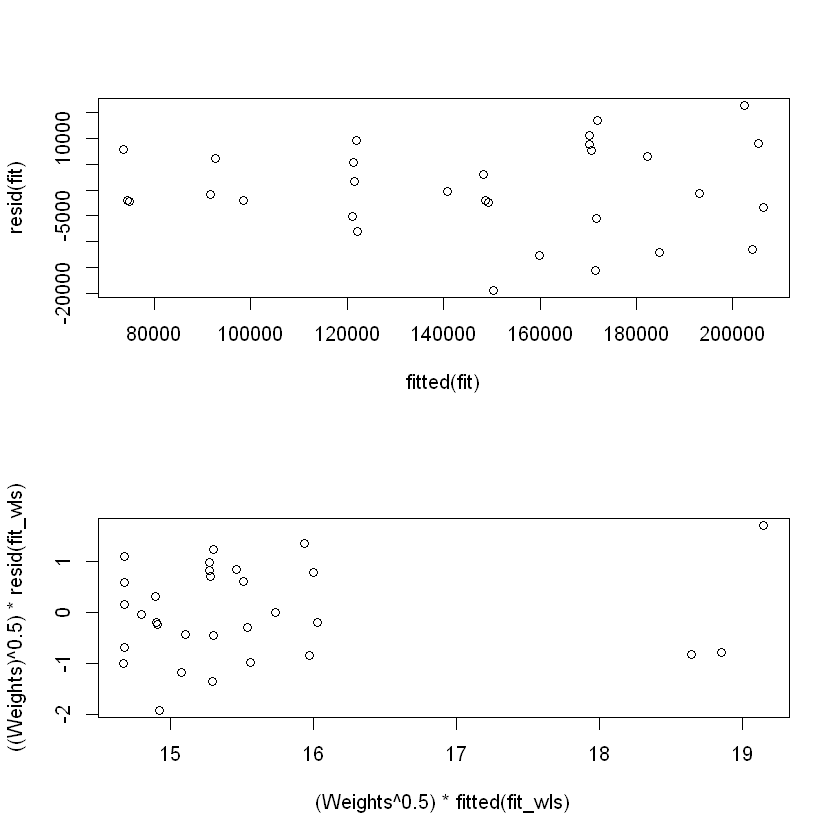

In [18]:
par(mfrow=c(2,1))
plot(fitted(fit),resid(fit))
plot((Weights^0.5)*fitted(fit_wls),((Weights)^0.5)*resid(fit_wls))

OLS fit 보다 나음 <br>
변수가 많으면 이러한 클러스터 분석 시각적으로 보기 어려움<br>
weight 추정할 때 x 값이 작으면 음수가 생길 수 있는 등, 추정이 reasonable 한지 확인